<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.392582,95.644676,-0.025138,184.012119,184.040020,-0.027901
1,0.0,1.0,45.671723,46.265613,0.041682,101.979019,101.934510,0.044509
2,0.0,2.0,73.455860,48.902217,0.027365,132.385443,132.356128,0.029315
3,0.0,3.0,33.865163,36.835060,-0.027762,80.672461,80.696206,-0.023745
4,0.0,4.0,20.389721,50.752412,0.027488,81.169621,81.139187,0.030434
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.933248,93.434074,-0.021175,150.346147,150.378311,-0.032164
249996,999.0,246.0,31.014248,65.351009,-0.045395,106.319862,106.368557,-0.048695
249997,999.0,247.0,51.852825,85.465383,-0.014280,147.303927,147.326417,-0.022490
249998,999.0,248.0,58.795313,87.368393,0.037923,156.201629,156.172064,0.029564


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.392582,95.644676,-0.025138,184.012119,184.040020,-0.027901
1,0.0,1.0,45.671723,46.265613,0.041682,101.979019,101.934510,0.044509
2,0.0,2.0,73.455860,48.902217,0.027365,132.385443,132.356128,0.029315
3,0.0,3.0,33.865163,36.835060,-0.027762,80.672461,80.696206,-0.023745
4,0.0,4.0,20.389721,50.752412,0.027488,81.169621,81.139187,0.030434
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.933248,93.434074,-0.021175,150.346147,150.378311,-0.032164
249996,999.0,246.0,31.014248,65.351009,-0.045395,106.319862,106.368557,-0.048695
249997,999.0,247.0,51.852825,85.465383,-0.014280,147.303927,147.326417,-0.022490
249998,999.0,248.0,58.795313,87.368393,0.037923,156.201629,156.172064,0.029564


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.392582  95.644676 -0.025138  184.012119  184.040020 -0.027901
      1.0    45.671723  46.265613  0.041682  101.979019  101.934510  0.044509
      2.0    73.455860  48.902217  0.027365  132.385443  132.356128  0.029315
      3.0    33.865163  36.835060 -0.027762   80.672461   80.696206 -0.023745
      4.0    20.389721  50.752412  0.027488   81.169621   81.139187  0.030434
...                ...        ...       ...         ...         ...       ...
999.0 245.0  46.933248  93.434074 -0.021175  150.346147  150.378311 -0.032164
      246.0  31.014248  65.351009 -0.045395  106.319862  106.368557 -0.048695
      247.0  51.852825  85.465383 -0.014280  147.303927  147.326417 -0.022490
      248.0  58.795313  87.368393  0.037923  156.201629  156.172064  0.029564
      249.0  55.115940  84.756781 -0.006751  149.865970  149.880504 -0.014534

[250000 rows x 6 columns]

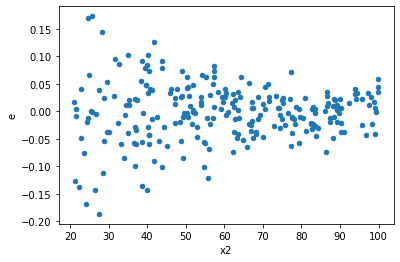

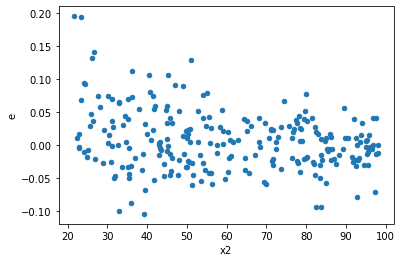

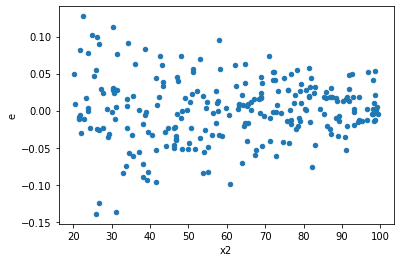

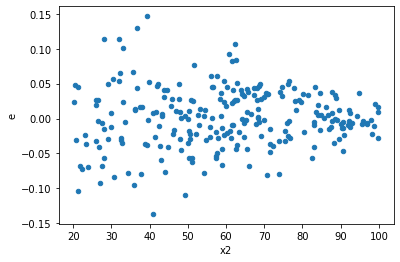

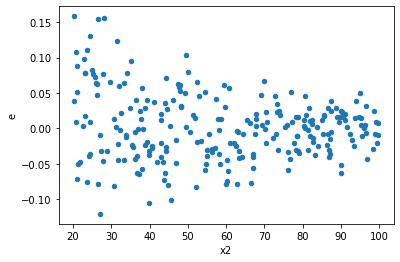

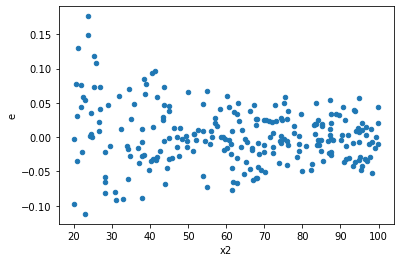

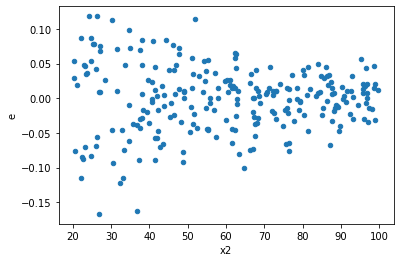

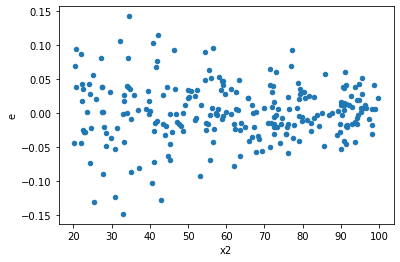

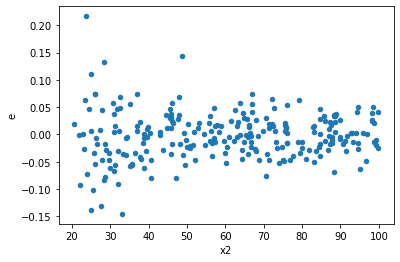

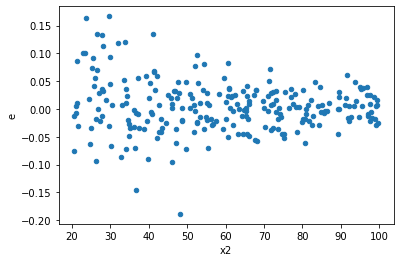

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,140.0,106.0,0.25146993747196744,0.4175390235738152,0.0017962138390854817,0.003939047392205804,2.192972410351385,3.0448557342355187e-05,0.9999847757213288,1.5224278671177593e-05,Reject005=0 : Heteroscedasticity
2.0,115.0,131.0,0.1290645118513213,0.31999386252522155,0.001122300103054968,0.002442701240650546,2.1765134245300053,1.8562374411779103e-05,0.9999907188127941,9.281187205889552e-06,Reject005=0 : Heteroscedasticity
3.0,116.0,130.0,0.16151070347889754,0.28503920769481267,0.0013923336506801512,0.0021926092899600975,1.5747728921792659,0.011988731728473478,0.9940056341357633,0.005994365864236739,Reject005=0 : Heteroscedasticity
4.0,118.0,128.0,0.12770680206003854,0.3691529234921782,0.0010822610344071062,0.0028840072147826423,2.664798161529103,8.648123572818633e-08,0.9999999567593821,4.324061786409317e-08,Reject005=0 : Heteroscedasticity
7.0,109.0,137.0,0.12537825921282775,0.3262479849473159,0.0011502592588332821,0.002381372152900116,2.070291662173241,5.839954165254291e-05,0.9999708002291737,2.9199770826271454e-05,Reject005=0 : Heteroscedasticity
8.0,136.0,110.0,0.175624822761849,0.27716459985974545,0.0012913589908959485,0.0025196781805431404,1.9511833644298868,0.0003211033050847245,0.9998394483474576,0.00016055165254236226,Reject005=0 : Heteroscedasticity
11.0,123.0,123.0,0.09952049573054148,0.31248066446235284,0.0008091097213865161,0.0025404932070109986,3.13986241897765,6.777463035234632e-10,0.9999999996611268,3.388731517617316e-10,Reject005=0 : Heteroscedasticity
12.0,136.0,110.0,0.1286603966074427,0.37980195502603176,0.0009460323279959021,0.003452745045691198,3.64971147762527,1.458233533924158e-11,0.9999999999927088,7.29116766962079e-12,Reject005=0 : Heteroscedasticity
14.0,102.0,144.0,0.12895199036405647,0.32099338939410904,0.0012642351996476125,0.002229120759681313,1.7632168130602979,0.0017330754380557867,0.9991334622809721,0.0008665377190278933,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,140.0,106.0,0.25146993747196744,0.4175390235738152,0.0017962138390854817,0.003939047392205804,2.192972410351385,3.0448557342355187e-05,Reject005=0 : Heteroscedasticity
1.0,113.0,133.0,0.3024419817184385,0.16965252806618017,0.0026764777143224645,0.0012755829177908283,0.4765901509154673,6.366899310688384e-05,Reject005=0 : Heteroscedasticity
2.0,115.0,131.0,0.1290645118513213,0.31999386252522155,0.001122300103054968,0.002442701240650546,2.1765134245300053,1.8562374411779103e-05,Reject005=0 : Heteroscedasticity
3.0,116.0,130.0,0.16151070347889754,0.28503920769481267,0.0013923336506801512,0.0021926092899600975,1.5747728921792659,0.011988731728473478,Reject005=0 : Heteroscedasticity
4.0,118.0,128.0,0.12770680206003854,0.3691529234921782,0.0010822610344071062,0.0028840072147826423,2.664798161529103,8.648123572818633e-08,Reject005=0 : Heteroscedasticity
5.0,118.0,128.0,0.29280532484618893,0.14297042553520464,0.0024814010580185503,0.0011169564494937863,0.45013136666657944,1.4758838140875927e-05,Reject005=0 : Heteroscedasticity
6.0,128.0,118.0,0.4354628063888274,0.12248457692692666,0.003402053174912714,0.001038004889211243,0.3051113065679448,1.226095600934429e-10,Reject005=0 : Heteroscedasticity
7.0,109.0,137.0,0.12537825921282775,0.3262479849473159,0.0011502592588332821,0.002381372152900116,2.070291662173241,5.839954165254291e-05,Reject005=0 : Heteroscedasticity
8.0,136.0,110.0,0.175624822761849,0.27716459985974545,0.0012913589908959485,0.0025196781805431404,1.9511833644298868,0.0003211033050847245,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    986
Reject005=1 : Homoscedasticity       14
Name: Result_test, dtype: int64